In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math
import os
import types

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from utils3d.PDE_Model import PDE_Model
from utils3d.PDE_Model import PDE_Model_2
from utils3d.Preconditioner import Preconditioner
from utils3d.Preconditioner import change_fun

from utils3d.Mesh import Mesh
from utils3d.NeuralNet import PINN_NeuralNet

from utils3d.PINN import PINN
from utils3d.Postprocessing import View_results
from utils3d.PINN import PINN_Precond

from utils3d.XPINN import XPINN
from utils3d.Postprocessing import View_results_X


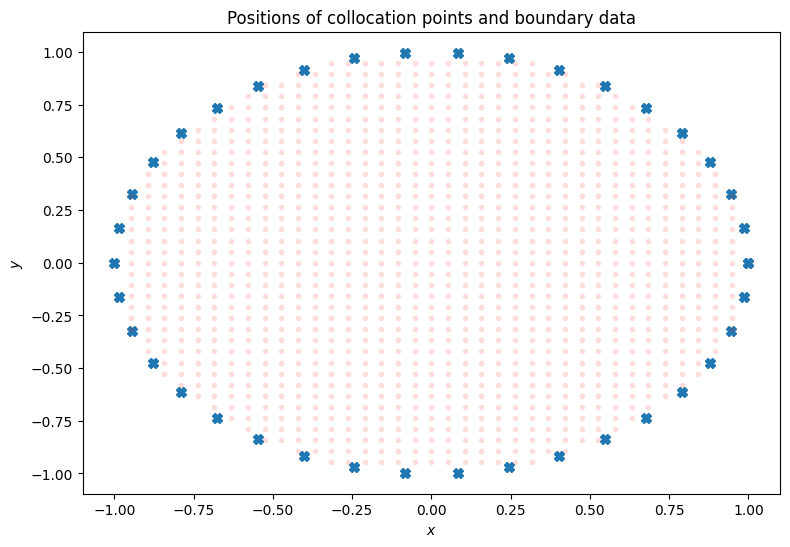

In [3]:
domain1 = ([-1,1],[-1,1],[-1,1])
PDE1 = PDE_Model()
domain1 = PDE1.set_domain(domain1)
PDE1.sigma = 0.04
PDE1.epsilon = 1

lb = {'type':'D', 'value':-1/(4*np.pi), 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1}

mesh1 = Mesh(domain1, N_b=60, N_r=1500)
mesh1.create_mesh(borders, ins_domain)
mesh1.plot_points_2d();


PINN_solver = PINN()

PINN_solver.adapt_PDE(PDE1)
weights = {
        'w_r': 1,
        'w_d': 1,
        'w_n': 1,
        'w_i': 1
}
PINN_solver.adapt_mesh(mesh1,**weights)

lr = ([2500,4000],[1e-2,5e-3,5e-4])
hyperparameters = {
        'input_shape': (None,3),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}

PINN_solver.create_NeuralNet(PINN_NeuralNet,lr,**hyperparameters)

In [4]:
PINN_solver.solve(N=1500,flag_time=True)

Loss: 0.14963354: 100%|██████████| 1500/1500 [15:00<00:00,  1.67it/s] 



Computation time: 900.8404388427734 seconds


In [8]:

PINN_solver.save_model('.saved_models','Test_pinn_3d') 

In [5]:
Post = View_results(PINN_solver)

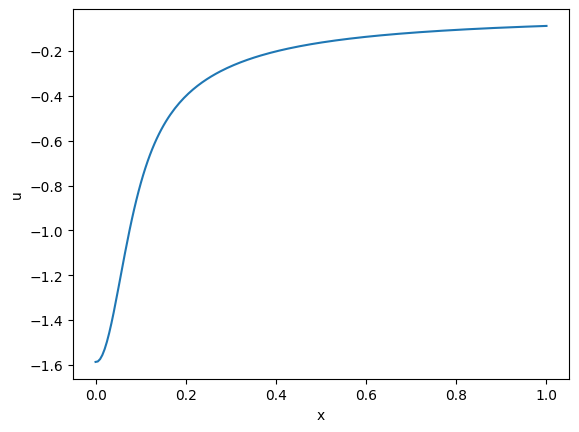

In [6]:
Post.plot_u_plane();

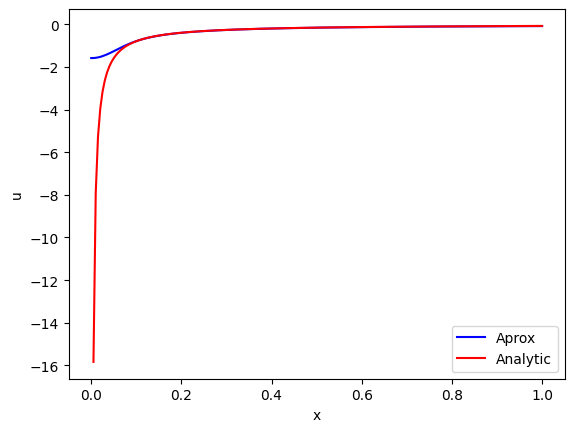

In [7]:
Post.plot_aprox_analytic()

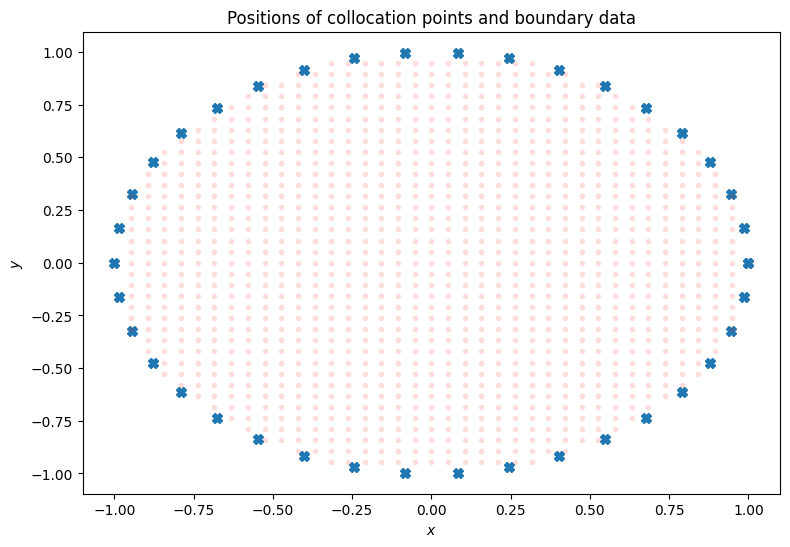

In [3]:
domain1 = ([-1,1],[-1,1],[-1,1])
PDE1 = PDE_Model()
domain1 = PDE1.set_domain(domain1)
PDE1.sigma = 0.04
PDE1.epsilon = 1

lb = {'type':'D', 'value':-1/(4*np.pi), 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1}

mesh1 = Mesh(domain1, N_b=60, N_r=1500)
mesh1.create_mesh(borders, ins_domain)
mesh1.plot_points_2d();


PINN_solver = PINN()

PINN_solver.adapt_PDE(PDE1)
weights = {
        'w_r': 1,
        'w_d': 1,
        'w_n': 1,
        'w_i': 1
}
PINN_solver.adapt_mesh(mesh1,**weights)

lr = ([2500,4000],[1e-2,5e-3,5e-4])
hyperparameters = {
        'input_shape': (None,3),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}


PINN_solver.load_NeuralNet('.saved_models','Test_pinn_3d',lr)

In [4]:
Post = View_results(PINN_solver)

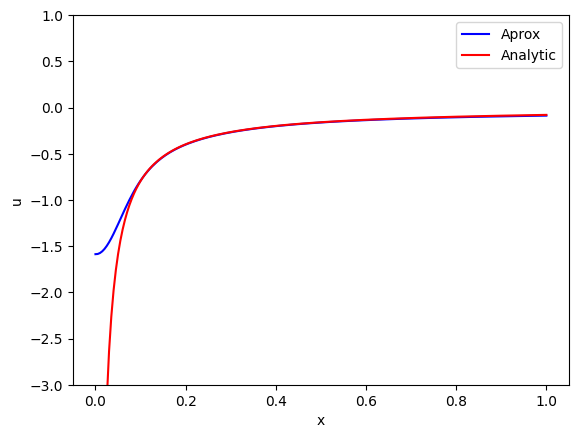

In [5]:
Post.plot_aprox_analytic()